# Realce no Domínio Espacial

### Carregando as imagens com ruido sal e pimenta

In [9]:
import cv2
import glob
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

In [10]:
def open_img(image_path):
    """
            Funcao responsavel por carregar imagens de um diretorio
            Arguments:
              image_path: Caminho do diretorio das imagens
            Return:
              dataset: Vetor, onde cada posição possui uma imagem carregada do diretório
        """
    dataset = []
    #carrega as imagens do diretorio
    for i in glob.glob(image_path + '/*.png', recursive=True):
        dataset.append(cv2.imread(i))
    for j in glob.glob(image_path + '/*.jpg', recursive=True):
        dataset.append(cv2.imread(j))
    # for k in glob.glob(image_path + '/*.gif', recursive=True):
    #     dataset.append(cv2.imread(k))

    return dataset

def show(pos,image,title):
  plt.subplot(pos)
  plt.imshow(image)
  plt.title(title)
  plt.axis('off')

In [11]:
image_path = '../dataset/sal-pimenta/'
dataset = open_img(image_path)

#### Exemplo de imagem do dataset

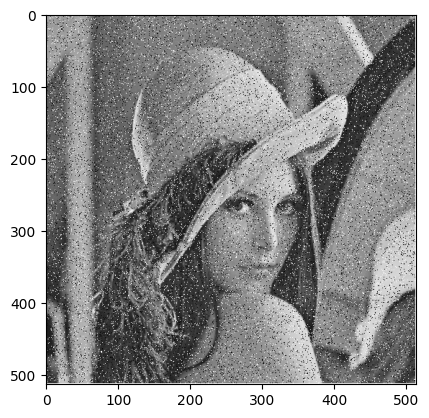

In [12]:
plt.imshow(dataset[0])

### Aplicação dos filtros de média

(A) Filtro média com n variando

<img src="images/item-a.png">

In [13]:
kernel_3x3 = np.ones((3,3),dtype=int)*(1/9)
kernel_5x5 = np.ones((5,5),dtype=int)*(1/25)
kernel_7x7 = np.ones((7,7),dtype=int)*(1/49)

In [14]:
mean_3x3,mean_5x5,mean_7x7 = [],[],[]
for image in dataset:
    mean_3x3.append(cv2.filter2D(image, -1, kernel_3x3))
    mean_5x5.append(cv2.filter2D(image, -1, kernel_5x5))
    mean_7x7.append(cv2.filter2D(image, -1, kernel_7x7))

### Mean Filter

C:\Users\stefane.santos\AppData\Local\Temp\ipykernel_15720\2568539113.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(pos)


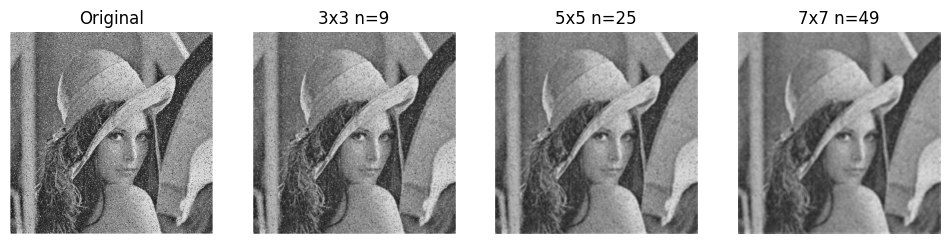

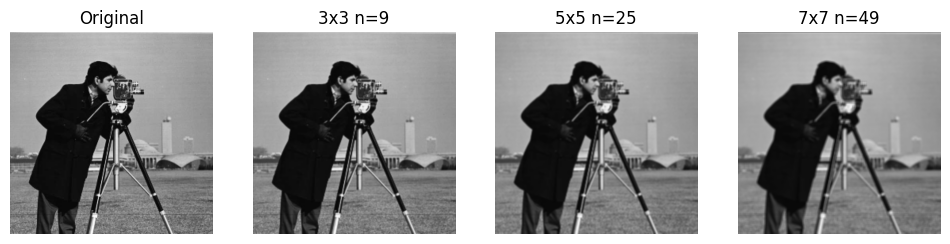

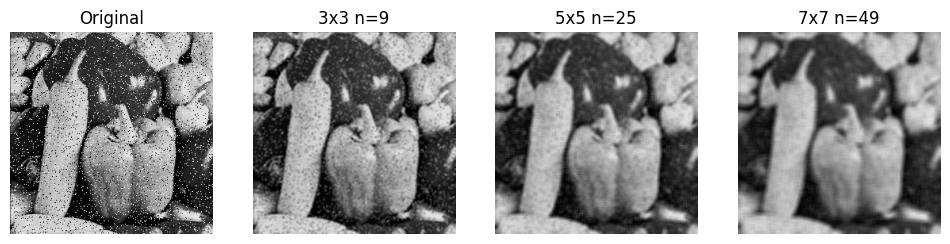

In [20]:
def mean_show(n):
   #Visualização
   plt.figure(figsize=(12,8))
   plt.axis('off')

   show(141,dataset[n],'Original')
   show(142,mean_3x3[n],'3x3 n=9')
   show(143,mean_5x5[n],'5x5 n=25')
   show(144,mean_7x7[n],'7x7 n=49')

display(Markdown(f'### Mean Filter'))
for n in range(len(dataset)): mean_show(n)

(B) Filtro média 3x3

<img src="images/item-b.png">

In [16]:
kernel_16 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])*(1/16)
mean_16 = []
for image in dataset:
    mean_16.append(cv2.filter2D(image, -1, kernel_16))

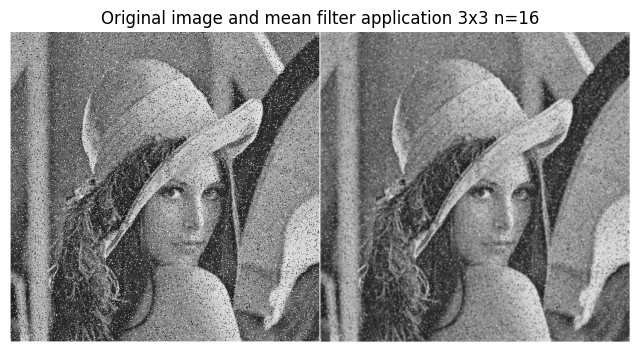

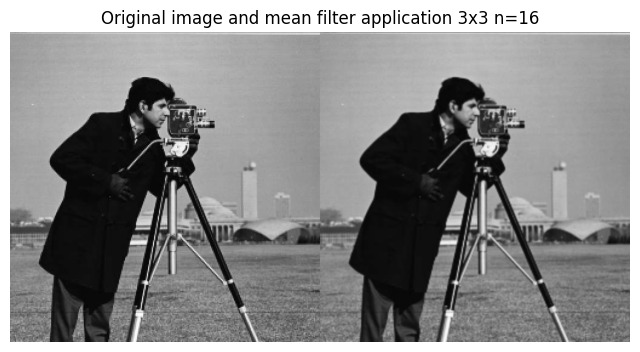

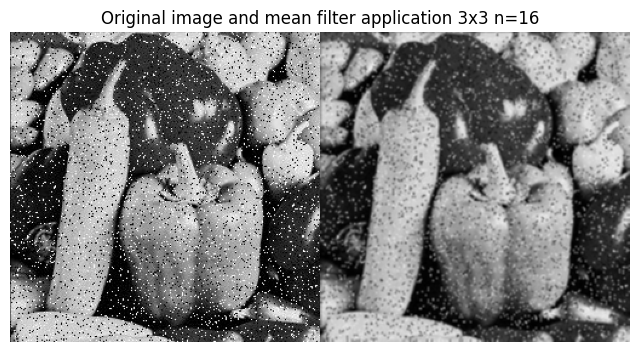

In [21]:
def mean_show_16(n):
    plt.figure(figsize=(8,6))
    plt.axis('off')
    plt.title('Original image and mean filter application 3x3 n=16')
    plt.imshow(np.concatenate((dataset[n],mean_16[n]), axis=1))

for n in range(len(dataset)): mean_show_16(n)

(C) Filtro	da	Mediana: 3x3, 5x5, 7x7

In [18]:
median_3x3, median_5x5, median_7x7 = [],[],[]
for image in dataset:
    median_3x3.append(cv2.medianBlur(image,3))
    median_5x5.append(cv2.medianBlur(image,5))
    median_7x7.append(cv2.medianBlur(image,7))

C:\Users\stefane.santos\AppData\Local\Temp\ipykernel_15720\2568539113.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(pos)


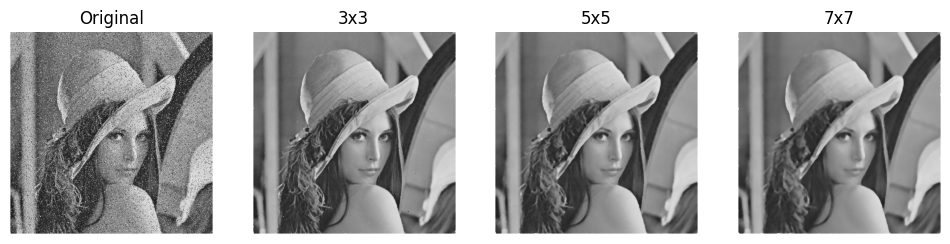

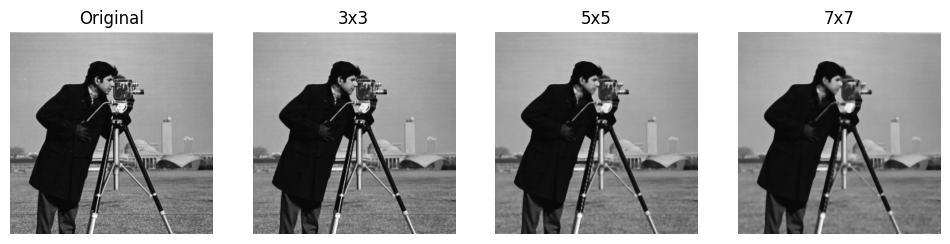

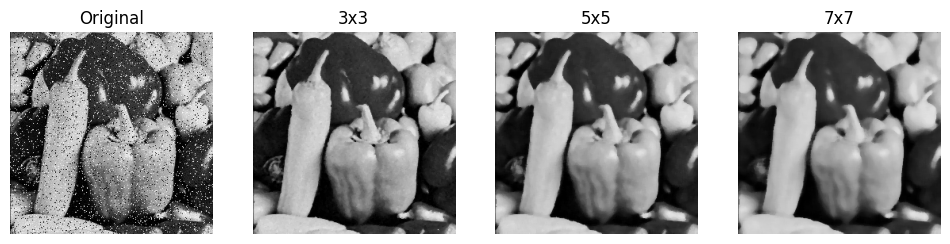

In [19]:
def median_show(n):
   #Visualização
   plt.figure(figsize=(12,8))
   plt.axis('off')

   show(141,dataset[n],'Original')
   show(142,median_3x3[n],'3x3')
   show(143,median_5x5[n],'5x5')
   show(144,median_7x7[n],'7x7')

for n in range(len(dataset)): median_show(n)